In [1]:
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

sys.path.append("..")
from Functions.UNSW_DF import *

x_train, x_test, y_train, y_test = DF_XY()

C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


( 1 ) Reading Preprocessed CSV files..
	 Training dataset loaded..
	 Testing dataset loaded..

( 2 ) Loading done, splitting into X and Y..
	 ( 2.1 ) x_train Shape:  	 (175341, 53)
	 ( 2.2 ) y_train Shape:  	 (175341,)
	 ( 2.3 ) x_test Shape:  	 (82332, 53)
	 ( 2.4 ) y_test Shape:  	 (82332,)
( 3 ) Done!
PS! Import with: x_train, x_test, y_train, y_test = XY_import()


In [2]:
df_org = pd.read_csv("Analysis_SVM/SVM_scores(1-500).csv")
df = pd.read_csv("Analysis_SVM/SVM_scores(1-500).csv")
df.drop("error", axis=1, inplace=True)

In [3]:
columns = ["accuracy", "F1", "precision", "recall"]

for col in columns:
    df[col] *= 100


In [4]:
df_melt = pd.melt(df, id_vars="C", 
             var_name="metric", 
             value_name="score")

### Jointplot

In [5]:
df_reg = pd.read_csv("Analysis_SVM/SVM_scores(1-500).csv")

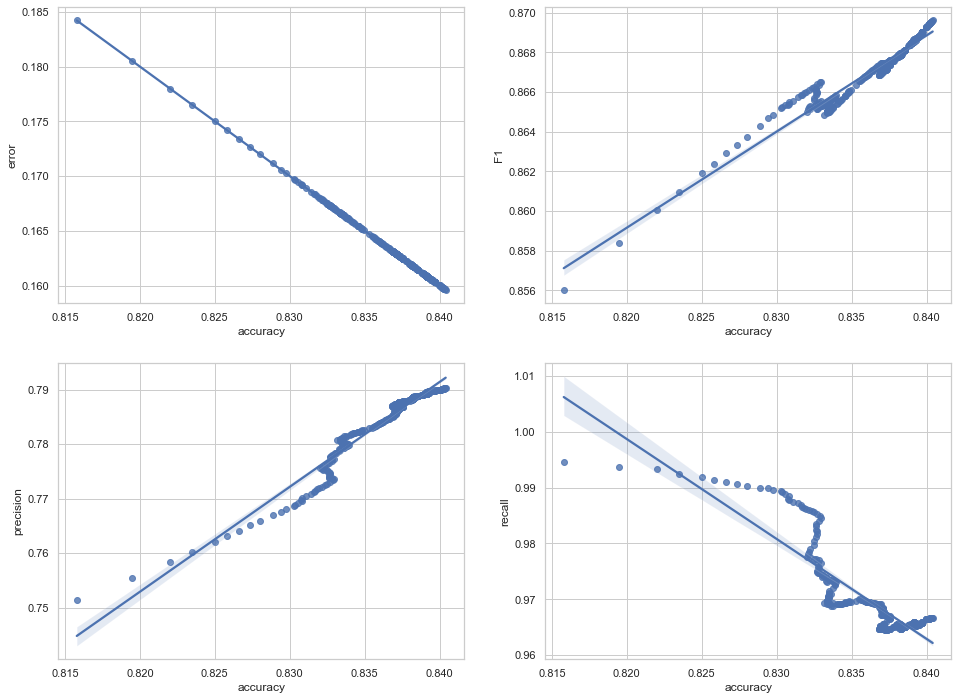

In [6]:
sns.set(rc={"figure.figsize":(16, 12), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=2, nrows=2)
ax=sns.regplot(x='accuracy', y='error', data=df_reg, ax=axs[0, 0])
ax=sns.regplot(x='accuracy', y='F1', data=df_reg, ax=axs[0,1])
ax=sns.regplot(x='accuracy', y='precision', data=df_reg, ax=axs[1,0])
ax=sns.regplot(x='accuracy', y='recall', data=df_reg, ax=axs[1, 1])

#fig.suptitle("Logistic Regression Results (Regression Plot)", size=16)
#ax.figure.savefig("Analysis_SVM/SVM_regplot.png", dpi=400)

## SNS PAIRPLOT

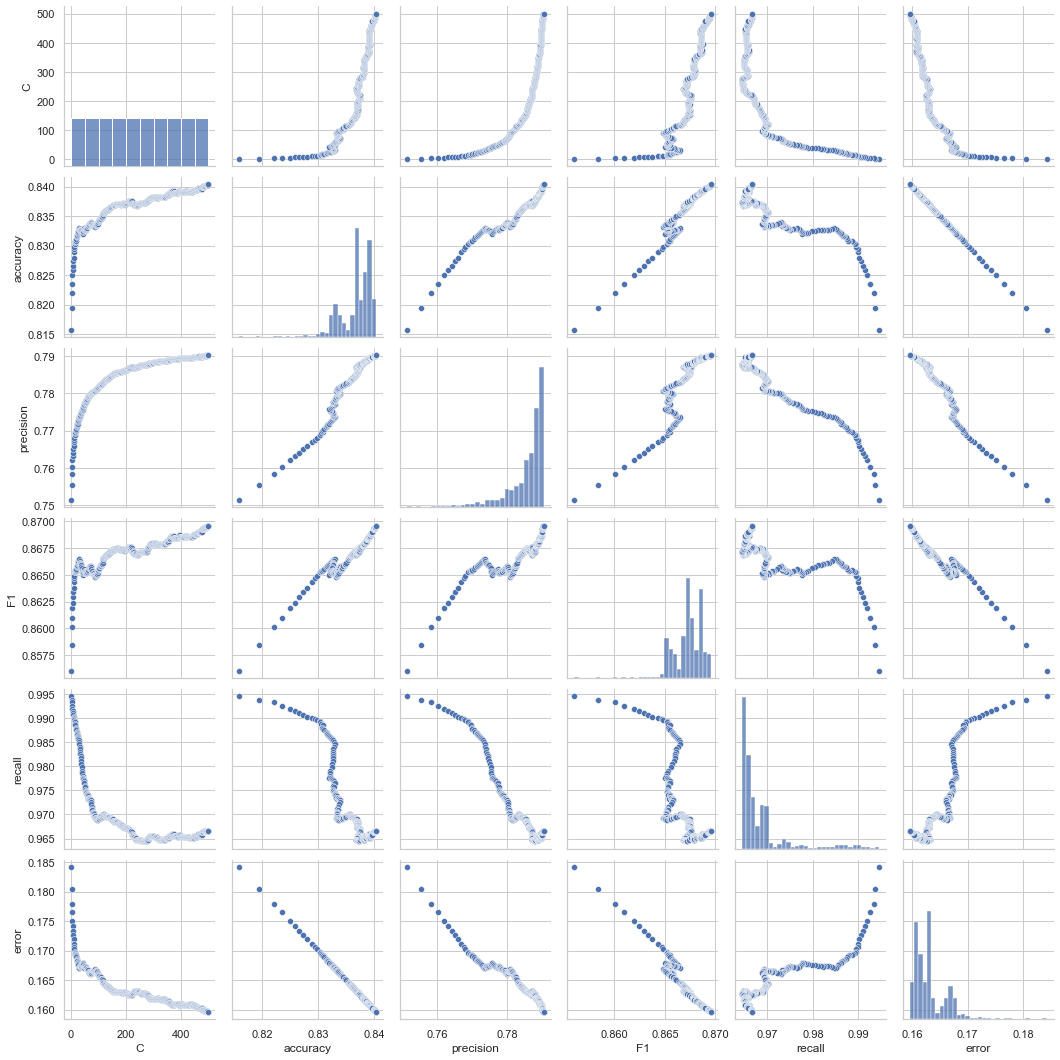

In [7]:
df_pair = pd.read_csv("Analysis_SVM/SVM_scores(1-500).csv")
df
sns.pairplot(df_pair)

## SNS Heatmap

C:\Users\Sajepan\AppData\Local\Temp/ipykernel_15716/779101550.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

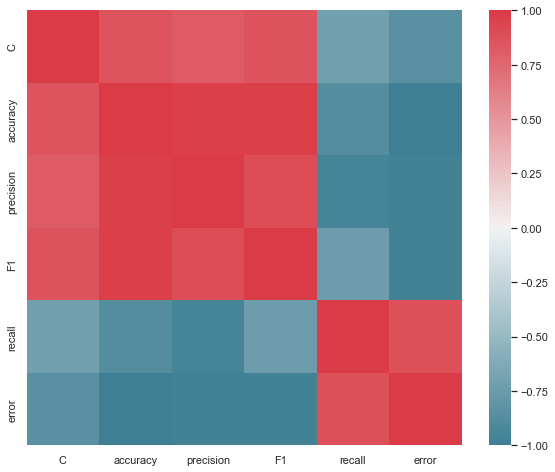

In [8]:
import seaborn as sns
df_heat = pd.read_csv("Analysis_SVM/SVM_scores(1-500).csv")
f, ax = plt.subplots(figsize=(10, 8))
corr = df_heat.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Line plot

In [9]:
df_15 = df_org[:15]
df_200 = df_org[:200]
df_500 = df_org[:500]
df_15.drop("error", axis=1, inplace=True)
df_200.drop("error", axis=1, inplace=True)
df_500.drop("error", axis=1, inplace=True)

C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
columns = ["accuracy", "F1", "precision", "recall"]

for col in columns:
    df_15[col] *= 100
    df_200[col] *= 100
    df_500[col] *= 100

C:\Users\Sajepan\AppData\Local\Temp/ipykernel_15716/3164900813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_15[col] *= 100
C:\Users\Sajepan\AppData\Local\Temp/ipykernel_15716/3164900813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_200[col] *= 100
C:\Users\Sajepan\AppData\Local\Temp/ipykernel_15716/3164900813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [11]:
df_melt_15 = pd.melt(df_15, id_vars="C", 
             var_name="metric", 
             value_name="score")
df_melt_200 = pd.melt(df_200, id_vars="C", 
             var_name="metric", 
             value_name="score")
df_melt_500 = pd.melt(df_500, id_vars="C", 
             var_name="metric", 
             value_name="score")

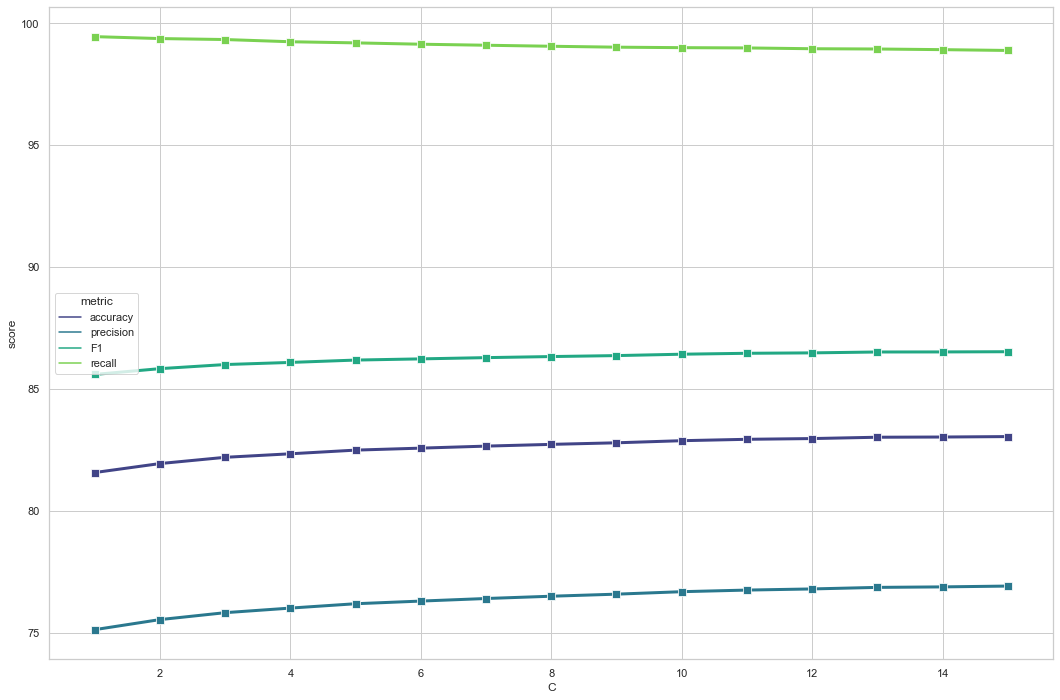

In [12]:
ax_line = sns.set(rc={"figure.figsize":(18, 12), 'axes.facecolor':'white',})
ax_line = sns.set_style("whitegrid")
ax_line = sns.lineplot(x = "C", y = "score", hue = "metric", data = df_melt_15, linewidth=3, marker="s", markersize=8, palette="viridis")
ax_line.figure.savefig("Analysis_SVM/C_1to15_line", dpi=400)

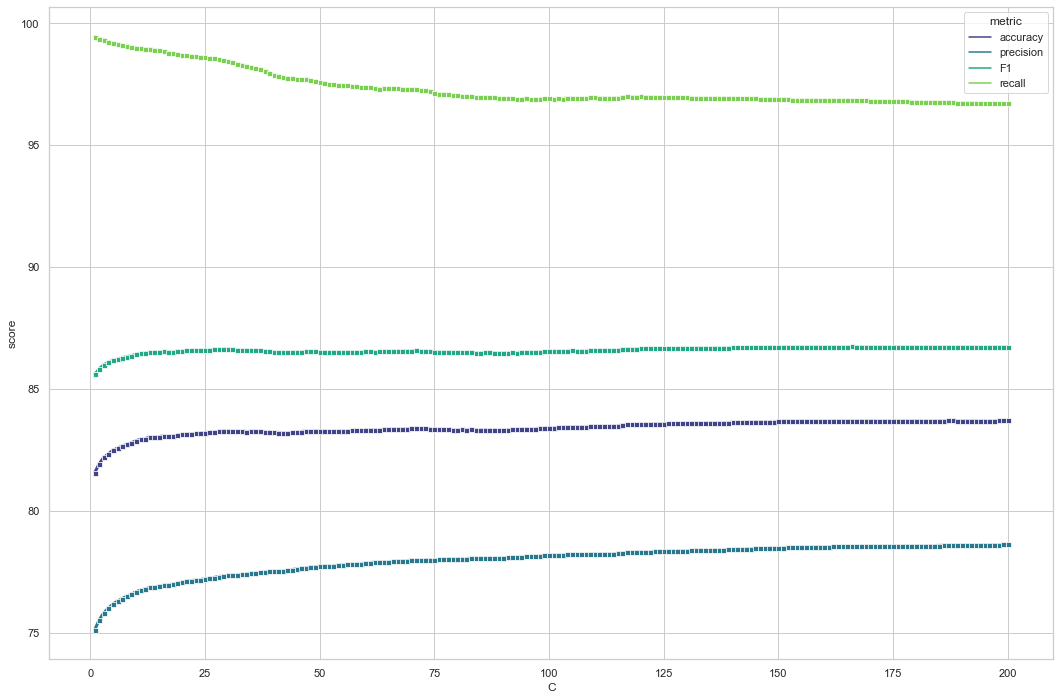

In [13]:
ax_line = sns.set(rc={"figure.figsize":(18, 12), 'axes.facecolor':'white',})
ax_line = sns.set_style("whitegrid")
ax_line = sns.lineplot(x = "C", y = "score", hue = "metric", data = df_melt_200, linewidth=3, marker="s", markersize=5, palette="viridis")
ax_line.figure.savefig("Analysis_SVM/C_1to200_line", dpi=400)

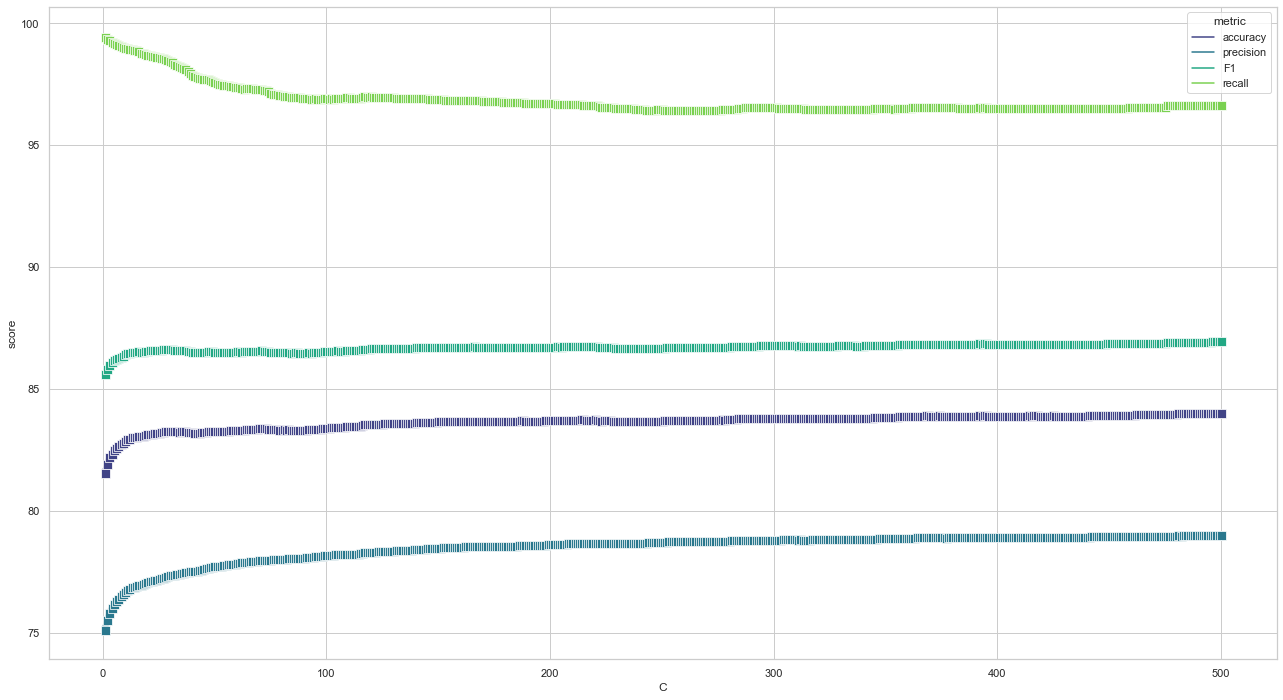

In [14]:
ax_line = sns.set(rc={"figure.figsize":(22, 12), 'axes.facecolor':'white',})
ax_line = sns.set_style("whitegrid")
ax_line = sns.lineplot(x = "C", y = "score", hue = "metric", data = df_melt_500, linewidth=6, marker="s", markersize=9, palette="viridis")
ax_line.figure.savefig("Analysis_SVM/C_1to500_line", dpi=400)